# Echoregions Demonstration

In [1]:
import echoregions as er

In [2]:
evr_file = '../echoregions/test_data/ek60/x1.evr'
echo_files = '../echoregions/test_data/ek60/hake_nc/'

## Converting

### Get a Regions2D object with `read_evr`

In [3]:
r2d = er.read_evr(evr_file)

### Save the EVR file as a JSON

In [4]:
r2d.to_json(pretty=True)
r2d.output_file

'..\\echoregions\\test_data\\ek60\\x1.json'

### Or save it as a CSV file

Get the data as a Pandas DataFrame with `to_dataframe` or save directly with `to_csv`

In [5]:
r2d.to_dataframe()

,file_name,file_type,file_format_number,echoview_version,region_id,point_idx,ping_time,depth,structure_version,point_count,...,bounding_rectangle_calculated,bounding_rectangle_left_x,bounding_rectangle_top_y,bounding_rectangle_right_x,bounding_rectangle_bottom_y,region_classification,type,name,notes,detection_settings
0,x1,EVRG,7,9.0.279.33861,1,0,D20170625T1612343335,-9999.9900000000,13,4,...,1,D20170625T1612343335,-9999.990000,D20170625T1612382880,9999.990000,Log,2,CTD005,[CTD005 at depth],[]
1,x1,EVRG,7,9.0.279.33861,1,1,D20170625T1612343335,9999.9900000000,13,4,...,1,D20170625T1612343335,-9999.990000,D20170625T1612382880,9999.990000,Log,2,CTD005,[CTD005 at depth],[]
2,x1,EVRG,7,9.0.279.33861,1,2,D20170625T1612382880,9999.9900000000,13,4,...,1,D20170625T1612343335,-9999.990000,D20170625T1612382880,9999.990000,Log,2,CTD005,[CTD005 at depth],[]
3,x1,EVRG,7,9.0.279.33861,1,3,D20170625T1612382880,-9999.9900000000,13,4,...,1,D20170625T1612343335,-9999.990000,D20170625T1612382880,9999.990000,Log,2,CTD005,[CTD005 at depth],[]
4,x1,EVRG,7,9.0.279.33861,2,0,D20170625T1631363385,-9999.9900000000,13,4,...,1,D20170625T1631363385,-9999.990000,D20170625T1631402115,9999.990000,Log,2,VN001,[VN001 @ PC1500],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,x1,EVRG,7,9.0.279.33861,34,3,D20170626T0144582565,-9999.9900000000,13,4,...,1,D20170626T0144554085,-9999.990000,D20170626T0144582565,9999.990000,Log,2,VN006,[Vertical net 006 at PC60],[]
134,x1,EVRG,7,9.0.279.33861,35,0,D20170626T0110584576,9.2447583998,13,4,...,1,D20170626T0110584576,9.244758,D20170626T0220098722,758.973217,Side station,0,Region35,[],[]
135,x1,EVRG,7,9.0.279.33861,35,1,D20170626T0110584576,758.9732173069,13,4,...,1,D20170626T0110584576,9.244758,D20170626T0220098722,758.973217,Side station,0,Region35,[],[]
136,x1,EVRG,7,9.0.279.33861,35,2,D20170626T0220098722,758.9732173069,13,4,...,1,D20170626T0110584576,9.244758,D20170626T0220098722,758.973217,Side station,0,Region35,[],[]


## Plotting

In [6]:
import matplotlib.pyplot as plt
import xarray as xr
import os
import echopype as ep

In [7]:
# Display availible regions
print(r2d.region_ids)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35']


In [8]:
# Get points from a particular region
points = r2d.get_points_from_region('11')
points

[['D20170625T2001470930', '102.2552007996'],
 ['D20170625T2001361638', '103.7403107496'],
 ['D20170625T2001378879', '109.5322395548'],
 ['D20170625T2001212025', '113.5420364200'],
 ['D20170625T2000591807', '116.2152343301'],
 ['D20170625T2001014815', '125.1258940304'],
 ['D20170625T2001014815', '126.0169600004'],
 ['D20170625T2001350142', '127.9476029355'],
 ['D20170625T2002085357', '120.0765202002'],
 ['D20170625T2002068059', '106.7105306497']]

By default, a parsed file will have datetime as a string described [here](https://support.echoview.com/WebHelp/Reference/File_formats/Export_file_formats/2D_Region_definition_file_format.htm#Data_formats). For example: `D20170625T1612343335` for June 25, 2017 at 16:12:34.3335.

EVR datetimes are not automatically converted, but the entire EVR data can be converted in-place with `r2d.convert_output()`

In [9]:
# Convert these timestamps into a form that can be plotted (numpy datetime64)
r2d.convert_points(points)

[[array('2017-06-25T20:01:47.093000', dtype='datetime64[us]'), 102.2552007996],
 [array('2017-06-25T20:01:36.163800', dtype='datetime64[us]'), 103.7403107496],
 [array('2017-06-25T20:01:37.887900', dtype='datetime64[us]'), 109.5322395548],
 [array('2017-06-25T20:01:21.202500', dtype='datetime64[us]'), 113.54203642],
 [array('2017-06-25T20:00:59.180700', dtype='datetime64[us]'), 116.2152343301],
 [array('2017-06-25T20:01:01.481500', dtype='datetime64[us]'), 125.1258940304],
 [array('2017-06-25T20:01:01.481500', dtype='datetime64[us]'), 126.0169600004],
 [array('2017-06-25T20:01:35.014200', dtype='datetime64[us]'), 127.9476029355],
 [array('2017-06-25T20:02:08.535700', dtype='datetime64[us]'), 120.0765202002],
 [array('2017-06-25T20:02:06.805900', dtype='datetime64[us]'), 106.7105306497]]

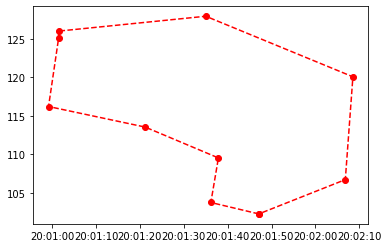

In [10]:
# Or plot the region with `plot_region`
r2d.plot_region(11)

## Plotting regions on an echogram

In [11]:
raw_files = os.listdir(echo_files)
raw_files

['Summer2017-D20170625-T124834.nc',
 'Summer2017-D20170625-T132103.nc',
 'Summer2017-D20170625-T134400.nc',
 'Summer2017-D20170625-T140924.nc',
 'Summer2017-D20170625-T143450.nc',
 'Summer2017-D20170625-T150430.nc',
 'Summer2017-D20170625-T153818.nc',
 'Summer2017-D20170625-T161209.nc',
 'Summer2017-D20170625-T164600.nc',
 'Summer2017-D20170625-T171948.nc',
 'Summer2017-D20170625-T175136.nc',
 'Summer2017-D20170625-T181701.nc',
 'Summer2017-D20170625-T184227.nc',
 'Summer2017-D20170625-T190753.nc',
 'Summer2017-D20170625-T193400.nc',
 'Summer2017-D20170625-T195927.nc',
 'Summer2017-D20170625-T202452.nc',
 'Summer2017-D20170625-T205018.nc',
 'Summer2017-D20170625-T211542.nc',
 'Summer2017-D20170625-T214108.nc',
 'Summer2017-D20170625-T220634.nc',
 'Summer2017-D20170625-T223159.nc',
 'Summer2017-D20170625-T225724.nc',
 'Summer2017-D20170625-T232250.nc',
 'Summer2017-D20170625-T234816.nc']

In [12]:
# Select the file(s) that a region is contained in. Using region 11 in this case.
file = r2d.select_raw(raw_files, '11')
file

'Summer2017-D20170625-T195927.nc'

In [13]:
# Calibrate the file with echopype
ed = ep.process.EchoData(echo_files + file)
proc = ep.process.Process('EK60', ed)
proc.get_Sv(ed)

10:29:23  calibrating data in ['../echoregions/test_data/ek60/hake_nc/Summer2017-D20170625-T195927.nc']


In [14]:
# Get depth offset (m)
plat = xr.open_dataset(echo_files + file, group='Platform')
water_level = plat.water_level[0, 0].values
water_level

array(9.14999962)

In [15]:
# Plot echogram for one frequency
ed.Sv['range'] = ed.Sv.range.isel(frequency=0, ping_time=0)
ed.Sv = ed.Sv.swap_dims({'range_bin': 'range'})

<IPython.core.display.Javascript object>


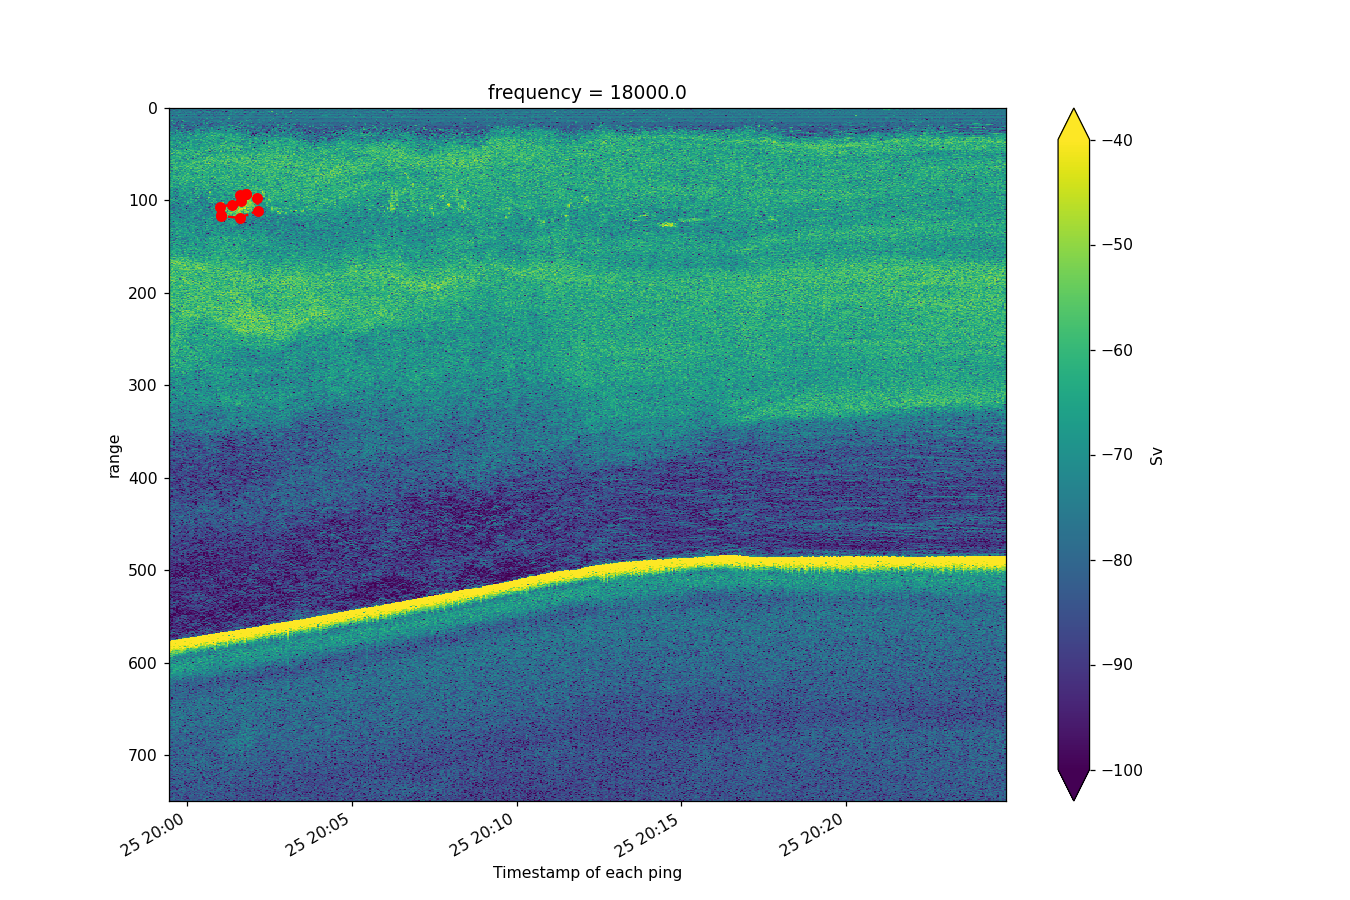

In [22]:
%matplotlib notebook
ed.Sv.Sv.isel(frequency=0).plot(x='ping_time', vmax=-40, vmin=-100, yincrease=False, figsize=(12,8))
# Plot region
r2d.plot_region(11, offset=-water_level)
plt.show()